<a href="https://colab.research.google.com/github/lawchris96/portfolio/blob/main/Churn_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import seaborn as sns

Churn Analysis

We are trying to predict whether a given customer will churn or not. We used a decision tree model to do so, we will try to explore this with logistic regression later.

Business questions:

1) Which customers will churn?

2) Do customer attributes (gender, senior citizen, partner, and etc.) affect the churn rate?

3) Do the types of services (phone services, multiple lines, internet services and etc.) subsribed to by the customers affect their churn rate?

4) How do customers make the decision to churn or not churn?

Before we start doing the EDA and modelling, we need to clean the data first as below, we remap certain column to 0 or 1, we convert certain column to numeric data type first, we detect any missing values and removed those records with msising value since only 2 records have missing value, we also peroformed outlier detection as below with the use of box plots.

In [54]:
df = pd.read_csv('https://raw.githubusercontent.com/lawchris96/datascienceclass/main/telco.csv')

In [3]:
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [5]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors="coerce")

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [7]:
binary_columns = ["Partner", "PhoneService", "Dependents", "PaperlessBilling", "Churn"]

for column in binary_columns:
  df[column] = df[column].map({"No":0, "Yes":1})

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   int64  
 4   Dependents        7043 non-null   int64  
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   int64  
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   int64  


In [9]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,1,0,1,0,No phone service,DSL,No,...,No,No,No,No,Month-to-month,1,Electronic check,29.85,29.85,0
1,5575-GNVDE,Male,0,0,0,34,1,No,DSL,Yes,...,Yes,No,No,No,One year,0,Mailed check,56.95,1889.50,0
2,3668-QPYBK,Male,0,0,0,2,1,No,DSL,Yes,...,No,No,No,No,Month-to-month,1,Mailed check,53.85,108.15,1
3,7795-CFOCW,Male,0,0,0,45,0,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,0,Bank transfer (automatic),42.30,1840.75,0
4,9237-HQITU,Female,0,0,0,2,1,No,Fiber optic,No,...,No,No,No,No,Month-to-month,1,Electronic check,70.70,151.65,1


In [10]:
df["MultipleLines"].unique()

array(['No phone service', 'No', 'Yes'], dtype=object)

In [11]:
df["MultipleLines"] = df["MultipleLines"].map({"No":0, "Yes":1, "No phone service":0})

In [12]:
df["MultipleLines"].unique()

array([0, 1])

In [13]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,1,0,1,0,0,DSL,No,...,No,No,No,No,Month-to-month,1,Electronic check,29.85,29.85,0
1,5575-GNVDE,Male,0,0,0,34,1,0,DSL,Yes,...,Yes,No,No,No,One year,0,Mailed check,56.95,1889.50,0
2,3668-QPYBK,Male,0,0,0,2,1,0,DSL,Yes,...,No,No,No,No,Month-to-month,1,Mailed check,53.85,108.15,1
3,7795-CFOCW,Male,0,0,0,45,0,0,DSL,Yes,...,Yes,Yes,No,No,One year,0,Bank transfer (automatic),42.30,1840.75,0
4,9237-HQITU,Female,0,0,0,2,1,0,Fiber optic,No,...,No,No,No,No,Month-to-month,1,Electronic check,70.70,151.65,1


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   int64  
 4   Dependents        7043 non-null   int64  
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   int64  
 7   MultipleLines     7043 non-null   int64  
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   int64  


In [15]:
df["OnlineSecurity"].unique()

array(['No', 'Yes', 'No internet service'], dtype=object)

In [16]:
df["OnlineSecurity"] = df["OnlineSecurity"].map({"No":0, "Yes":1, "No internet service":0})

In [17]:
df["OnlineSecurity"].unique()

array([0, 1])

In [18]:
df["InternetService"].unique()

array(['DSL', 'Fiber optic', 'No'], dtype=object)

In [19]:
df = pd.get_dummies(data=df, columns=["InternetService"])

In [20]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,...,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,InternetService_DSL,InternetService_Fiber optic,InternetService_No
0,7590-VHVEG,Female,0,1,0,1,0,0,0,Yes,...,No,Month-to-month,1,Electronic check,29.85,29.85,0,1,0,0
1,5575-GNVDE,Male,0,0,0,34,1,0,1,No,...,No,One year,0,Mailed check,56.95,1889.50,0,1,0,0
2,3668-QPYBK,Male,0,0,0,2,1,0,1,Yes,...,No,Month-to-month,1,Mailed check,53.85,108.15,1,1,0,0
3,7795-CFOCW,Male,0,0,0,45,0,0,1,No,...,No,One year,0,Bank transfer (automatic),42.30,1840.75,0,1,0,0
4,9237-HQITU,Female,0,0,0,2,1,0,0,No,...,No,Month-to-month,1,Electronic check,70.70,151.65,1,0,1,0


In [21]:
df["gender"] = df["gender"].map({"Female":0, "Male":1})

In [22]:
internet_columns = ['DeviceProtection', 'TechSupport', 'OnlineBackup', 'StreamingTV', 'StreamingMovies']

for column in internet_columns:
  df[column] = df[column].map({"No":0, "Yes":1, "No internet service":0})

In [23]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,...,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,InternetService_DSL,InternetService_Fiber optic,InternetService_No
0,7590-VHVEG,0,0,1,0,1,0,0,0,1,...,0,Month-to-month,1,Electronic check,29.85,29.85,0,1,0,0
1,5575-GNVDE,1,0,0,0,34,1,0,1,0,...,0,One year,0,Mailed check,56.95,1889.50,0,1,0,0
2,3668-QPYBK,1,0,0,0,2,1,0,1,1,...,0,Month-to-month,1,Mailed check,53.85,108.15,1,1,0,0
3,7795-CFOCW,1,0,0,0,45,0,0,1,0,...,0,One year,0,Bank transfer (automatic),42.30,1840.75,0,1,0,0
4,9237-HQITU,0,0,0,0,2,1,0,0,0,...,0,Month-to-month,1,Electronic check,70.70,151.65,1,0,1,0


In [24]:
df.describe()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,InternetService_DSL,InternetService_Fiber optic,InternetService_No
count,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7032.000000,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.504756,0.162147,0.483033,0.299588,32.371149,0.903166,0.421837,0.286668,0.344881,0.343888,0.290217,0.384353,0.387903,0.592219,64.761692,2283.300441,0.265370,0.343746,0.439585,0.216669
std,0.500013,0.368612,0.499748,0.458110,24.559481,0.295752,0.493888,0.452237,0.475363,0.475038,0.453895,0.486477,0.487307,0.491457,30.090047,2266.771362,0.441561,0.474991,0.496372,0.412004
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18.250000,18.800000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,9.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,35.500000,401.450000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,0.000000,0.000000,29.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,70.350000,1397.475000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,1.000000,55.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,89.850000,3794.737500,1.000000,1.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,72.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,118.750000,8684.800000,1.000000,1.000000,1.000000,1.000000


In [25]:
# Missing data in TotalCharges (7032/7043)
# (7043-7032)/7043 * 100% = 0.11%, only 11 missing values
# this is not a significant amount, we can filter out those records with missing value
# we need to filter out those 11 records that contains a missing value of total charges
# because incomplete data -> incomplete or inaccurate results

# if 80% of the records has missing value, we cannot filter them, we need to replace the missing value of
# total charges, normally we take the mean value of the total charges to replace the missing value
# dont simply filter out missing value records, check is it a lot of records or only a few.
df = df.dropna()

In [26]:
df.describe()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,InternetService_DSL,InternetService_Fiber optic,InternetService_No
count,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000
mean,0.504693,0.162400,0.482509,0.298493,32.421786,0.903299,0.421928,0.286547,0.344852,0.343857,0.290102,0.384386,0.388367,0.592719,64.798208,2283.300441,0.265785,0.343572,0.440273,0.216155
std,0.500014,0.368844,0.499729,0.457629,24.545260,0.295571,0.493902,0.452180,0.475354,0.475028,0.453842,0.486484,0.487414,0.491363,30.085974,2266.771362,0.441782,0.474934,0.496455,0.411650
min,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18.250000,18.800000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,9.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,35.587500,401.450000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,0.000000,0.000000,29.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,70.350000,1397.475000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,1.000000,55.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,89.862500,3794.737500,1.000000,1.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,72.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,118.750000,8684.800000,1.000000,1.000000,1.000000,1.000000


In [27]:
df.info()
# always check for missing value before you process them

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7042
Data columns (total 23 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   customerID                   7032 non-null   object 
 1   gender                       7032 non-null   int64  
 2   SeniorCitizen                7032 non-null   int64  
 3   Partner                      7032 non-null   int64  
 4   Dependents                   7032 non-null   int64  
 5   tenure                       7032 non-null   int64  
 6   PhoneService                 7032 non-null   int64  
 7   MultipleLines                7032 non-null   int64  
 8   OnlineSecurity               7032 non-null   int64  
 9   OnlineBackup                 7032 non-null   int64  
 10  DeviceProtection             7032 non-null   int64  
 11  TechSupport                  7032 non-null   int64  
 12  StreamingTV                  7032 non-null   int64  
 13  StreamingMovies   

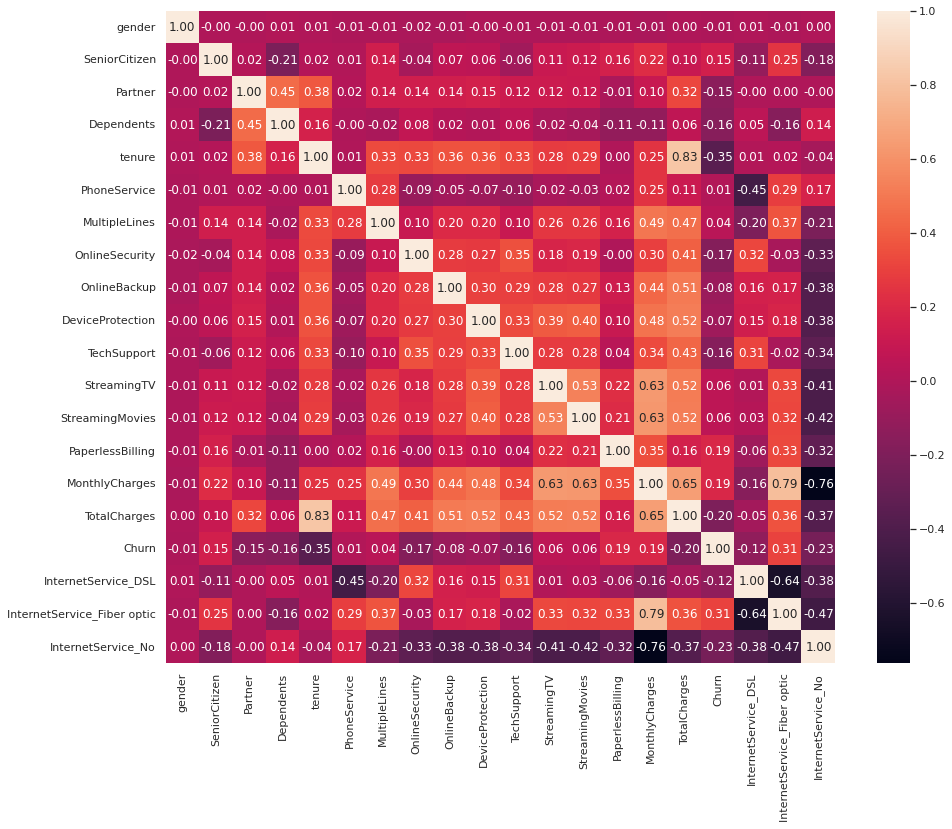

In [28]:
sns.set(rc={'figure.figsize':(15,12)})

corr = df.corr()
sns.heatmap(corr, annot=True, fmt=".2f")

In [29]:
from matplotlib import pyplot as plt

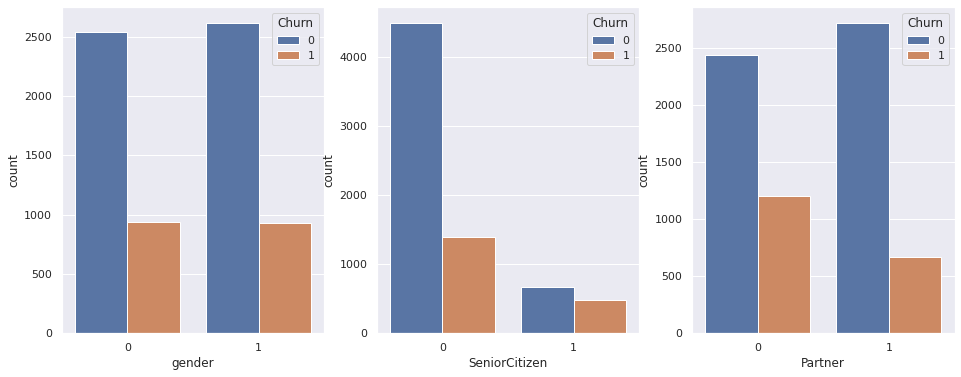

In [30]:
main, subplots = plt.subplots(1, 3, figsize=(16,6))
sns.countplot(data=df, x="gender", hue="Churn", ax=subplots[0])
sns.countplot(data=df, x="SeniorCitizen", hue="Churn", ax=subplots[1])
sns.countplot(data=df, x="Partner", hue="Churn", ax=subplots[2])

In [31]:
# we can see the relationship between gender, senior citizen and partner with churn gender 0 = female and gender 1 = male
# how many of them churn we have 7032 customers here, how many of them male and female, how many of them churn

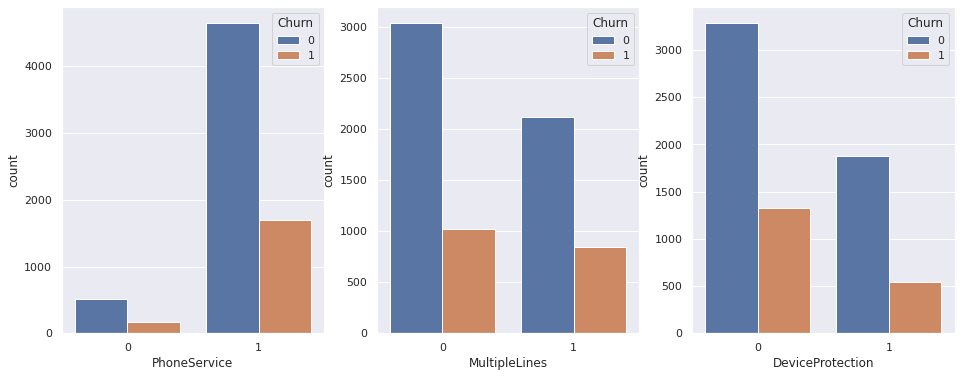

In [32]:
main, subplots = plt.subplots(1, 3, figsize=(16,6))
sns.countplot(data=df, x="PhoneService", hue="Churn", ax=subplots[0])
sns.countplot(data=df, x="MultipleLines", hue="Churn", ax=subplots[1])
sns.countplot(data=df, x="DeviceProtection", hue="Churn", ax=subplots[2])

In [33]:
# phone service = 0 means what? phone service = 1 means what? means use data service only majority of the customers here use phone service = 1
# more customer with phone service, churn more customer without multiple lines, churn more but customer with single line
# means no insurance plan, customer without device protection plan churn more

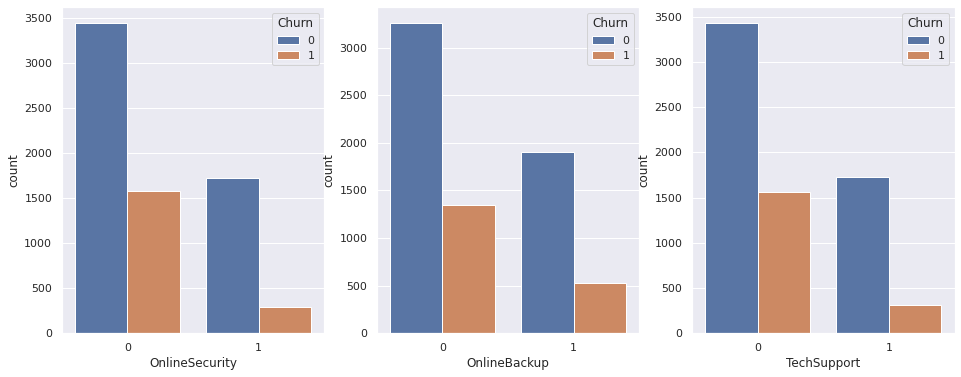

In [34]:
main, subplots = plt.subplots(1, 3, figsize=(16,6))
sns.countplot(data=df, x="OnlineSecurity", hue="Churn", ax=subplots[0])
sns.countplot(data=df, x="OnlineBackup", hue="Churn", ax=subplots[1])
sns.countplot(data=df, x="TechSupport", hue="Churn", ax=subplots[2])

In [35]:
# customer with online security, online backup and tech support plan churn less, why?

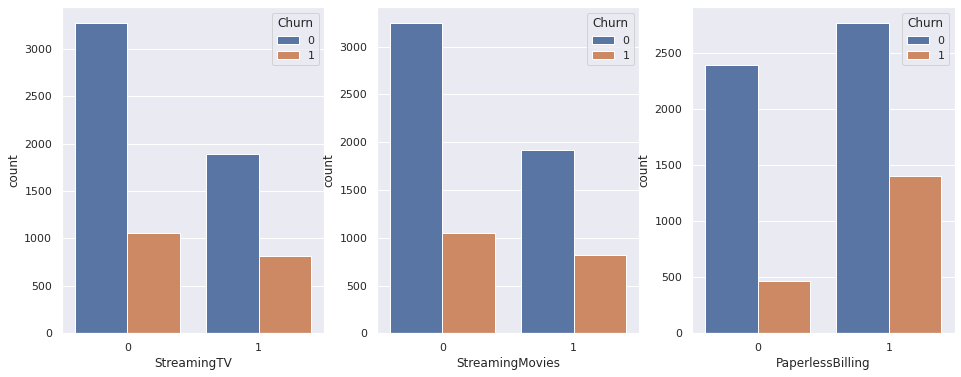

In [36]:
main, subplots = plt.subplots(1, 3, figsize=(16,6))
sns.countplot(data=df, x="StreamingTV", hue="Churn", ax=subplots[0])
sns.countplot(data=df, x="StreamingMovies", hue="Churn", ax=subplots[1])
sns.countplot(data=df, x="PaperlessBilling", hue="Churn", ax=subplots[2])

In [37]:
# customer with paperless billing churn more whereas customer with streaming tv and streaming movie is about the same, why?

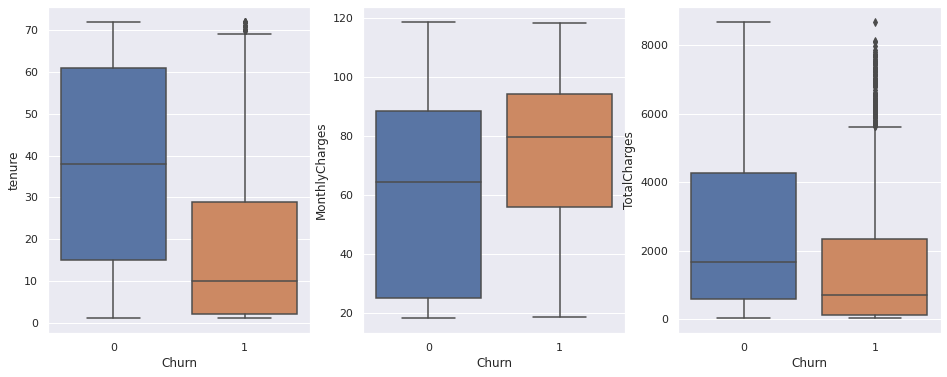

In [38]:
main, subplots = plt.subplots(1, 3, figsize=(16,6))
sns.boxplot(data=df, y="tenure", x="Churn", ax=subplots[0])
sns.boxplot(data=df, y="MonthlyCharges", x="Churn", ax=subplots[1])
sns.boxplot(data=df, y="TotalCharges", x="Churn", ax=subplots[2])

In [39]:
# for tenure and total charges we notice some outliers here we used a boxplot here to check for outliers value, please investigate why
# outliers in statistics means something unusual here,
# example of outliers, someone age is 235, cannot be/very rare

In [40]:
columns = ['SeniorCitizen', 'Partner', 'PhoneService', 'DeviceProtection', 'OnlineSecurity',
           'OnlineBackup', 'TechSupport', 'PaperlessBilling', 'tenure', 'MonthlyCharges', 'TotalCharges']

In [41]:
train_data = df[columns] # what are the factors that affect the churn decisions
train_labels = df['Churn'] # what you want the machine to predict, which column

We are trying to predict whether the customer will churn or not based on the attribute value in the column, 
Are you senior citizen?
Do you have a partner? 
Do you have phone service? 
Do you subscribe for device protection plan? etc., 

We set a label column here churn, our target variable, what we want to predict here we will used decision tree machine learning model to do the prediction this model is a supervised learning techniques, need a label or target variable to be defined first

We are preparing the training data for machine to learn first

In [42]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(train_data, train_labels, test_size=0.3, random_state=1)

We will split our dataset that consist of 7032 records into 2 groups 70% will be used as a training set for the machine to learn and study the patterns 30% will be used as a test set for the machine to apply what they have learn and do the prediction X axis = column y axis = churn if we know X value than we can predict Y value

In [43]:
from sklearn import tree

model = tree.DecisionTreeClassifier(max_depth = 3)
model.fit(train_data, train_labels)

DecisionTreeClassifier(max_depth=3)

Send the dataset into decision tree model, training set and test set. Training set for learning purposes, test set for application/prediction purposes, the machine will learn from the training data first before they can do any prediction on the test data

We used decision tree model here with three levels only

In [44]:
y_pred = model.predict(X_test)
# we start the run the prediction on the test set based on what the machine learn from the training set data

In [45]:
from sklearn import metrics
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))
# we evaluate the accuracy of the prediction, the machine will compared with the predicted vs actual value for churn

Accuracy: 0.795260663507109


In [46]:
import graphviz
columns =  list(train_data.columns)

dot_data = tree.export_graphviz(model, out_file=None, feature_names=columns, class_names=['No', 'Yes'], filled=True, rounded=True)

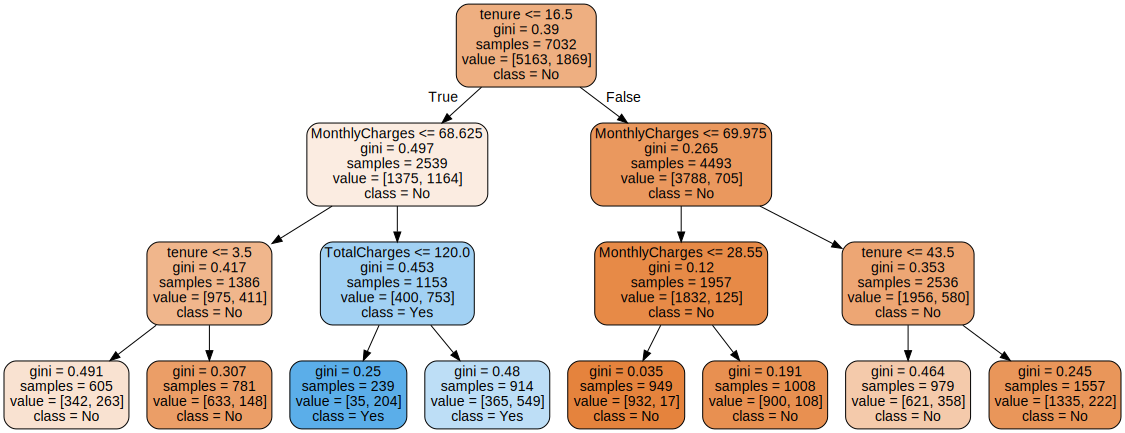

In [47]:
graph = graphviz.Source(dot_data)
graph

In [48]:
df_predict = train_data.iloc[0:0].copy()
df_predict.describe()
# copy only the table structure not the data

,SeniorCitizen,Partner,PhoneService,DeviceProtection,OnlineSecurity,OnlineBackup,TechSupport,PaperlessBilling,tenure,MonthlyCharges,TotalCharges
count,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
max,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [49]:
df_predict = df_predict.append({
    "SeniorCitizen":0,
    "Partner":0,
    "PhoneService":1,
    "DeviceProtection":1,
    "OnlineSecurity":0,
    "OnlineBackup":0,
    "TechSupport":1,
    "PaperlessBilling":1,
    "tenure":12,
    "MonthlyCharges":50,
    "TotalCharges":70
}, ignore_index=True)
# add a new record to df
df_predict

,SeniorCitizen,Partner,PhoneService,DeviceProtection,OnlineSecurity,OnlineBackup,TechSupport,PaperlessBilling,tenure,MonthlyCharges,TotalCharges
0,0,0,1,1,0,0,1,1,12,50.0,70.0


In [50]:
model.predict(df_predict)
# use the decision tree model to do the prediction, no churn = 0, loyal customers based on the decision tree model prediction

array([0])